In [5]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

In [50]:
# download dados ultimos anos
data_inicio = '2021-1-20'
data_final = datetime.now()
ativo = 'ELET3.SA' 
dados_ativo = pdr.get_data_yahoo(ativo,start=data_inicio, end=data_final)

In [51]:
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-20,33.570000,32.75,33.500000,33.000000,2952000.0,30.667994
2021-01-21,33.150002,30.58,32.860001,31.299999,12453600.0,29.088129
2021-01-22,30.780001,29.02,30.780001,30.240000,14677400.0,28.103033
2021-01-26,28.360001,26.52,27.350000,27.309999,47532200.0,25.380089
2021-01-27,28.760000,27.32,27.370001,28.120001,17305600.0,26.132849


In [52]:
dados_ativo.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-26,35.450001,34.349998,34.660000,35.099998,6236000.0,35.099998
2022-01-27,36.200001,34.669998,35.599998,34.900002,4578400.0,34.900002
2022-01-28,35.529999,34.630001,34.750000,35.430000,3141100.0,35.430000
2022-01-31,35.650002,34.650002,35.490002,35.290001,3807500.0,35.290001
2022-02-01,35.459999,34.439999,35.410000,34.630001,2319700.0,34.630001


In [53]:
dados_ativo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2021-01-20 to 2022-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       257 non-null    float64
 1   Low        257 non-null    float64
 2   Open       257 non-null    float64
 3   Close      257 non-null    float64
 4   Volume     257 non-null    float64
 5   Adj Close  257 non-null    float64
dtypes: float64(6)
memory usage: 14.1 KB


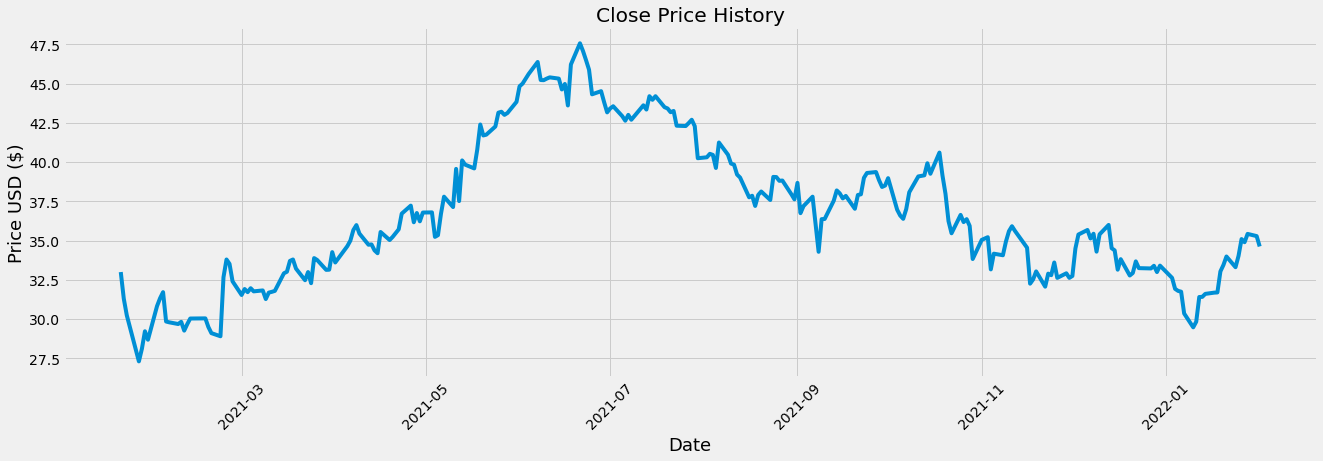

In [54]:
# vizualização dos dados

plt.figure(figsize=(20,6))
plt.plot( dados_ativo['Close'],  label='Close')
plt.xticks(rotation=45) 
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [55]:
# calculo OBV (on balance volume)
OBV = []
OBV.append(0)
for i in range(1, len(dados_ativo.Close)):
    if dados_ativo.Close[i] > dados_ativo.Close[i-1]: 
          OBV.append(OBV[-1] + dados_ativo.Volume[i]) 
    elif dados_ativo.Close[i] < dados_ativo.Close[i-1]:
          OBV.append( OBV[-1] - dados_ativo.Volume[i])
    else:
          OBV.append(OBV[-1])

In [56]:
dados_ativo['OBV'] = OBV
dados_ativo['M20-OBV'] = dados_ativo['OBV'].ewm(com=20).mean()
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close,OBV,M20-OBV
Date,,,,,,,,
2021-01-20,33.570000,32.75,33.500000,33.000000,2952000.0,30.667994,0.0,0.000000e+00
2021-01-21,33.150002,30.58,32.860001,31.299999,12453600.0,29.088129,-12453600.0,-6.378673e+06
2021-01-22,30.780001,29.02,30.780001,30.240000,14677400.0,28.103033,-27131000.0,-1.363623e+07
2021-01-26,28.360001,26.52,27.350000,27.309999,47532200.0,25.380089,-74663200.0,-3.002702e+07
2021-01-27,28.760000,27.32,27.370001,28.120001,17305600.0,26.132849,-57357600.0,-3.603909e+07


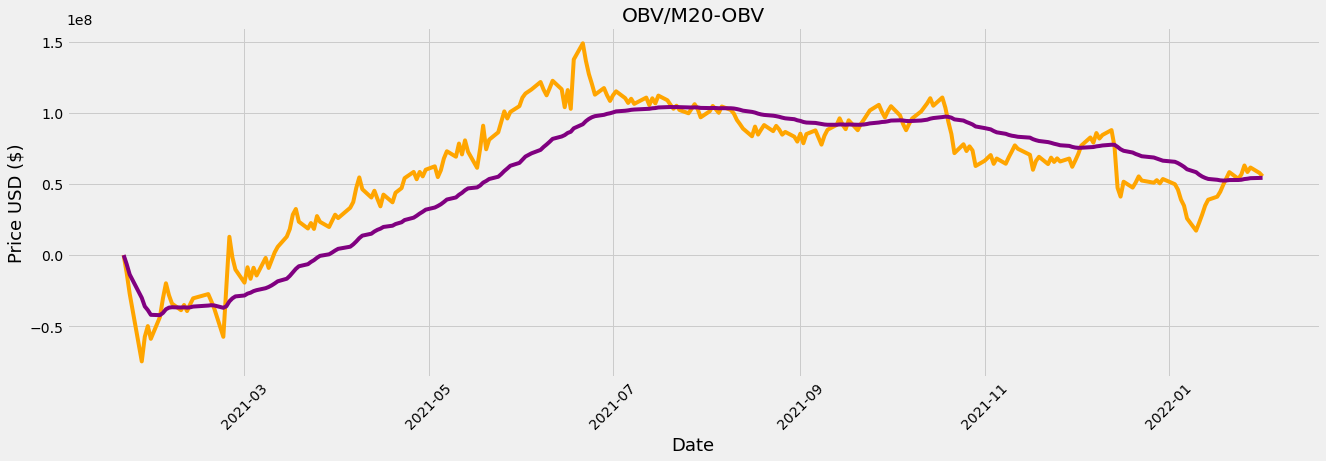

In [57]:
# vizualização no grafico

plt.figure(figsize=(20,6))
plt.plot( dados_ativo['OBV'],  label='OBV', color= 'orange')
plt.plot( dados_ativo['M20-OBV'],  label='M20-OBV', color= 'purple')
plt.xticks(rotation=45) 
plt.title('OBV/M20-OBV')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [58]:
# Criação da função de sinal 
# If OBV > M20-OBV  Buy
# If OBV < M20-OBV Sell
# Else não faz nada
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 
  
  for i in range(0,len(signal)):
    #if OBV > M20-OBV and flag != 1 buy else sell
      if signal[col1][i] > signal[col2][i] and flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
      # else  if OBV < M20-OBV  and flag != 0 sell else buy
      elif signal[col1][i] < signal[col2][i] and flag != 0:    
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
      #else   OBV == M20-OBV so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [59]:
# colunas de buy and sell
x = buy_sell(dados_ativo, 'OBV','M20-OBV' )
dados_ativo['Buy_Signal_Price'] = x[0]
dados_ativo['Sell_Signal_Price'] = x[1]
# mostrar dados
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close,OBV,M20-OBV,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2021-01-20,33.570000,32.75,33.500000,33.000000,2952000.0,30.667994,0.0,0.000000e+00,NaN,NaN
2021-01-21,33.150002,30.58,32.860001,31.299999,12453600.0,29.088129,-12453600.0,-6.378673e+06,NaN,31.299999
2021-01-22,30.780001,29.02,30.780001,30.240000,14677400.0,28.103033,-27131000.0,-1.363623e+07,NaN,NaN
2021-01-26,28.360001,26.52,27.350000,27.309999,47532200.0,25.380089,-74663200.0,-3.002702e+07,NaN,NaN
2021-01-27,28.760000,27.32,27.370001,28.120001,17305600.0,26.132849,-57357600.0,-3.603909e+07,NaN,NaN


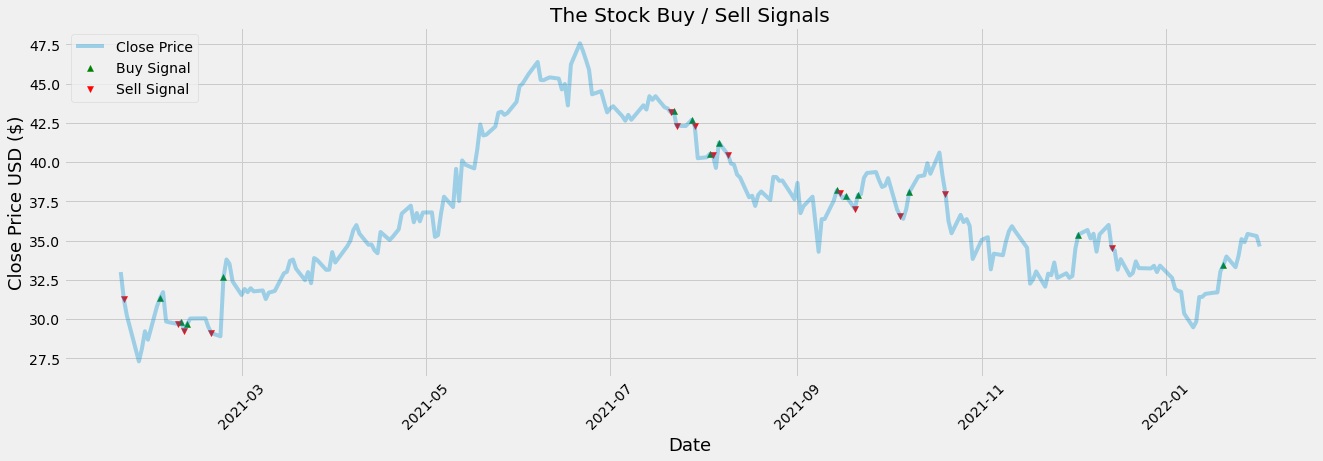

In [60]:
# vizualização dos dados
plt.figure(figsize=(20,6))
plt.scatter(dados_ativo.index, dados_ativo['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(dados_ativo.index, dados_ativo['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( dados_ativo['Close'],  label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title('The Stock Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()